# Лабораторная работа №1
## Кластерный иерархический анализ на датафрейме "digit"

In [265]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os

In [266]:
from src.config import FILE_DIGIT, ENCODINGS

In [267]:
os.chdir(r"C:\Users\print\OneDrive\Рабочий стол\Data_Analysis_in_Python\DA_on_python_labs\data")

In [268]:
os.getcwd()

'C:\\Users\\print\\OneDrive\\Рабочий стол\\Data_Analysis_in_Python\\DA_on_python_labs\\data'

#### Выполнена базовая подготовка к работе


In [269]:
df = pd.read_csv(FILE_DIGIT, encoding=ENCODINGS[0], sep=';')

In [270]:
df.head(5)

,A,B,C,D,E,F,G,H,A2,B2,C2,D2,E2,F2,G2,H2
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   A       500 non-null    object
 1   B       500 non-null    object
 2   C       500 non-null    object
 3   D       500 non-null    object
 4   E       500 non-null    object
 5   F       500 non-null    object
 6   G       500 non-null    object
 7   H       500 non-null    object
 8   A2      500 non-null    object
 9   B2      500 non-null    object
 10  C2      500 non-null    object
 11  D2      500 non-null    object
 12  E2      500 non-null    object
 13  F2      500 non-null    object
 14  G2      500 non-null    object
 15  H2      500 non-null    object
dtypes: object(16)
memory usage: 62.6+ KB


In [272]:
df.shape

(500, 16)

По какой-то причине данные в нашей таблице дублируются. Появились лишние 8 столбцов. Избавимся от них

Также при визуальном осмотре данных я выявил, что некоторые данные записаны с дополнительными пробелами, так что для начала избавимся от них

In [273]:
df = df.astype("string").apply(lambda s: s.str.strip())

In [274]:
drop_cols = [c for c in df.columns if c.endswith("2")]
df = df.drop(columns=drop_cols)

In [275]:
df.head(5)

,A,B,C,D,E,F,G,H
0,seven,ONE,ZERO,ONE,ZERO,ZERO,ONE,ZERO
1,one,ZERO,ZERO,ONE,ZERO,ZERO,ONE,ZERO
2,four,ZERO,ONE,ONE,ONE,ZERO,ONE,ZERO
3,two,ONE,ONE,ONE,ONE,ONE,ZERO,ZERO
4,eight,ZERO,ONE,ONE,ONE,ONE,ONE,ONE


Мы подготовили наш датафрейм для дальнейшей работы, но еще лучше перевести ONE и ZERO в числовой формат, для удобной работы с числами

In [276]:
for col in df.columns:
    print(col, "->", sorted(df[col].unique()))

A -> ['eight', 'five', 'four', 'nine', 'one', 'seven', 'six', 'three', 'two', 'zero']
B -> ['ONE', 'ZERO']
C -> ['ONE', 'ZERO']
D -> ['ONE', 'ZERO']
E -> ['ONE', 'ZERO']
F -> ['ONE', 'ZERO']
G -> ['ONE', 'ZERO']
H -> ['ONE', 'ZERO']


Убедились, что никаких других значений нет

In [277]:
seg_cols = list("BCDEFGH")
Y = df['A']
X = (df[seg_cols]
       .apply(lambda s: s.str.strip())
       .replace({"ONE": "1", "ZERO": "0"})
       .astype("int8"))


In [278]:
X.head(5)

,B,C,D,E,F,G,H
0,1,0,1,0,0,1,0
1,0,0,1,0,0,1,0
2,0,1,1,1,0,1,0
3,1,1,1,1,1,0,0
4,0,1,1,1,1,1,1


In [279]:
Y.head(5)

0    seven
1      one
2     four
3      two
4    eight
Name: A, dtype: string

In [335]:
X_2 = X.copy()
Y_2 = Y.copy()
X_AVERAGE = X.copy()
Y_AVERAGE = Y.copy()
X_J = X.copy()
Y_J = Y.copy()
X_CJ = X.copy()
Y_CJ = Y.copy()

Теперь данные нормализованы и можно приступать к кластеризации

Используем метод Варда, так как он формирует компактные кластеры, минимизируя прирост внутрикластерной дисперсии. Подходит как базовый “универсальный” вариант для числовых признаков, включая 0/1.

In [281]:
Z = linkage(X, method='ward', metric='euclidean')
print(type(Z))
print(Z.shape)
print(Z[:10])

<class 'numpy.ndarray'>
(499, 4)
[[  0.  13.   0.   2.]
 [  1.   5.   0.   2.]
 [  2.  18.   0.   2.]
 [ 42. 324.   0.   2.]
 [ 64. 210.   0.   2.]
 [  4. 394.   0.   2.]
 [ 28. 501.   0.   3.]
 [  6.  22.   0.   2.]
 [  7. 142.   0.   2.]
 [  8.  32.   0.   2.]]


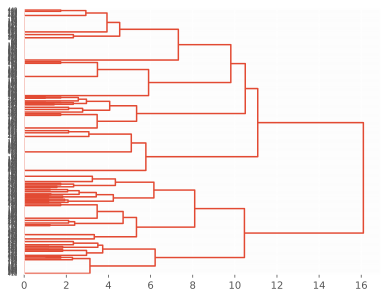

In [282]:
dn = dendrogram(Z,
                color_threshold=-1,
                labels=df.index.tolist(),
                orientation='right'
                )

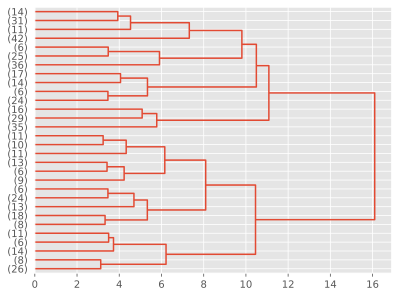

In [283]:
dn = dendrogram(Z,
                color_threshold=-1,
                labels=df.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=30
                )

Воспользуемся графиком "Каменистая осыпь"

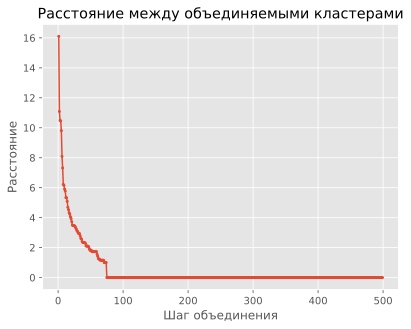

In [284]:
dist = Z[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=2)
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

Очень много нулевых значений, избавимся от них

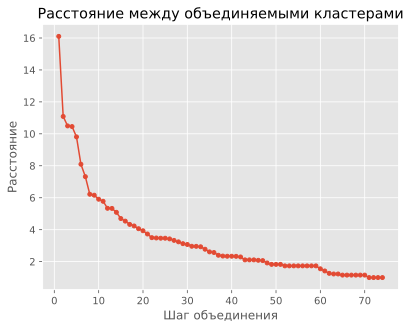

In [285]:
dist = Z[:, 2]
dist_rev = list(filter(lambda x: x > 0, dist[::-1]))
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=4)
#plt.yticks(np.arange(min(dist_rev[::-1]), max(dist_rev[::-1])+1, 3))
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

Видел резкий подъем в точке под номером 8, поэтому зададим высоту равную 6.9

In [286]:
h = 6.9

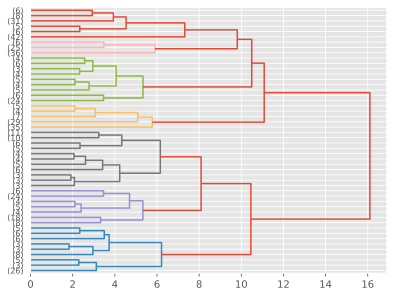

In [287]:
dn = dendrogram(Z,
                color_threshold=h,
                labels=df.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=50
                )

Добавим в наш набор данных информацию о кластерах

In [288]:
X['cluster'] = fcluster(Z, h, criterion='distance')

In [289]:
X.head()

,B,C,D,E,F,G,H,cluster
0,1,0,1,0,0,1,0,2
1,0,0,1,0,0,1,0,2
2,0,1,1,1,0,1,0,1
3,1,1,1,1,1,0,0,5
4,0,1,1,1,1,1,1,1


In [290]:
X.groupby('cluster').size()

cluster
1    65
2    69
3    60
4    80
5    61
6    67
7    42
8    56
dtype: int64

In [291]:
X.groupby('cluster').mean()

,B,C,D,E,F,G,H
cluster,,,,,,,
1,0.015385,0.907692,0.784615,0.953846,0.261538,0.907692,0.384615
2,0.507246,0.188406,1.000000,0.000000,0.115942,0.913043,0.057971
3,0.900000,0.600000,0.533333,0.633333,0.383333,0.983333,0.100000
4,1.000000,0.800000,0.000000,1.000000,0.475000,0.950000,1.000000
5,0.836066,0.344262,0.754098,0.983607,0.754098,0.000000,0.885246
6,1.000000,0.955224,1.000000,0.537313,1.000000,0.910448,1.000000
7,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
8,0.803571,0.000000,1.000000,0.803571,0.196429,1.000000,1.000000


In [292]:
ct = pd.crosstab(X["cluster"], Y)
ct

A,eight,five,four,nine,one,seven,six,three,two,zero
cluster,,,,,,,,,,
1,5,5,40,3,3,0,4,2,0,3
2,0,0,1,1,29,35,0,0,0,3
3,6,6,7,5,4,11,9,8,0,4
4,2,33,0,6,0,0,32,2,5,0
5,6,4,3,5,1,0,4,2,35,1
6,33,1,0,1,0,1,1,1,3,26
7,4,5,0,27,0,0,0,5,0,1
8,2,0,1,7,6,1,0,35,0,4


1) Кластер 1 - преобладает цифра 4
2) Кластер 2 - топ 1 - цифра 7, топ 2 - цифра 1. Кластер включает в себя сразу два числа. Скорее всего это связано с тем, что эти цифры достаточно похожи друг на друга.
3) Кластер 3 - неявных кластер, результаты разбросаны. Нет явного претендента.
4) Кластер 4 - два практически равных кандидата 5 и 6. Ситуация похожа на первый кластер, числа очень похожи друг на друга, поэтому не получилось явно разбить на кластеры.
5) Кластер 5 - кластер в котором преобладает цифра 2
6) Кластер 6 - класс 8 и 0. аналогичная ситуация. числа похожи
7) Кластер 7 - кластер числа 9.
8) Кластер 8 - кластер числа 3.

Количество кластеров получилось меньше, чем должно быть. + у нас есть один неявный кластер.

In [293]:
Z_2 = linkage(X_2, method='ward', metric='euclidean')

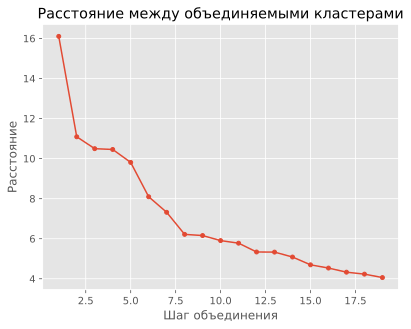

In [294]:
dist = Z_2[:, 2]
dist_rev = list(filter(lambda x: x > 4, dist[::-1]))
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=4)
#plt.yticks(np.arange(min(dist_rev[::-1]), max(dist_rev[::-1])+1, 3))
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

In [295]:
h_2 = 10

In [296]:
X_2['cluster'] = fcluster(Z_2, h_2, criterion='maxclust')

In [297]:
X_2.groupby('cluster').size()

cluster
1     34
2     31
3     69
4     28
5     32
6     80
7     61
8     67
9     42
10    56
dtype: int64

Попробовали разбить на 10 кластеров, ради эксперемента.

In [298]:
X_2.groupby('cluster').mean()

,B,C,D,E,F,G,H
cluster,,,,,,,
1,0.029412,0.852941,1.000000,1.000000,0.000000,0.852941,0.000000
2,0.000000,0.967742,0.548387,0.903226,0.548387,0.967742,0.806452
3,0.507246,0.188406,1.000000,0.000000,0.115942,0.913043,0.057971
4,0.785714,0.678571,0.000000,0.428571,0.428571,0.964286,0.214286
5,1.000000,0.531250,1.000000,0.812500,0.343750,1.000000,0.000000
6,1.000000,0.800000,0.000000,1.000000,0.475000,0.950000,1.000000
7,0.836066,0.344262,0.754098,0.983607,0.754098,0.000000,0.885246
8,1.000000,0.955224,1.000000,0.537313,1.000000,0.910448,1.000000
9,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000


In [299]:
ct_2 = pd.crosstab(X_2["cluster"], Y_2)
ct_2

A,eight,five,four,nine,one,seven,six,three,two,zero
cluster,,,,,,,,,,
1,0,0,30,0,3,0,0,1,0,0
2,5,5,10,3,0,0,4,1,0,3
3,0,0,1,1,29,35,0,0,0,3
4,1,5,3,0,2,6,9,1,0,1
5,5,1,4,5,2,5,0,7,0,3
6,2,33,0,6,0,0,32,2,5,0
7,6,4,3,5,1,0,4,2,35,1
8,33,1,0,1,0,1,1,1,3,26
9,4,5,0,27,0,0,0,5,0,1


Еще раз убедились, что разбиение кластера прошло неудачно

Попробуем другой вариант кластеризации

Попробуем метрику Hamming, поскольку признаки являются бинарными, а Hamming напрямую измеряет долю отличающихся сегментов между двумя объектами. Average объединяет кластеры по среднему расстоянию, что даёт устойчивые результаты при наличии шума/вариаций паттернов.

In [300]:
Z_AVERAGE = linkage(X_AVERAGE, method="average", metric="hamming")

In [301]:
print(type(Z_AVERAGE))
print(Z_AVERAGE.shape)
print(Z_AVERAGE[:10])

<class 'numpy.ndarray'>
(499, 4)
[[  0.  13.   0.   2.]
 [  1.   5.   0.   2.]
 [  2.  18.   0.   2.]
 [ 42. 324.   0.   2.]
 [ 64. 210.   0.   2.]
 [  4. 394.   0.   2.]
 [ 28. 501.   0.   3.]
 [  6.  22.   0.   2.]
 [  7. 142.   0.   2.]
 [  8.  32.   0.   2.]]


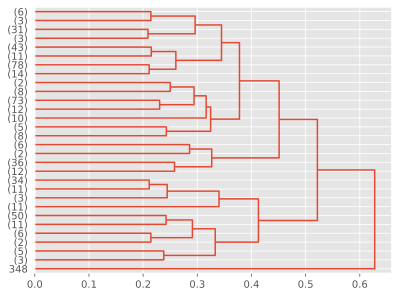

In [302]:
dn = dendrogram(Z_AVERAGE,
                color_threshold=-1,
                labels=df.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=30
                )

Воспользуемся графиком "Каменистая осыпь"

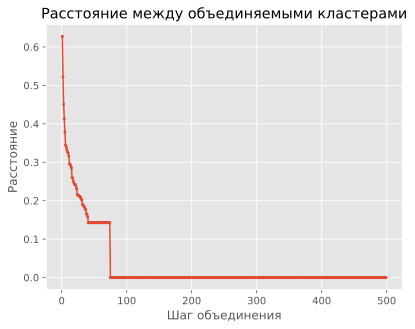

In [303]:
dist = Z_AVERAGE[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=2)
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

Очень много нулевых значений, избавимся от них

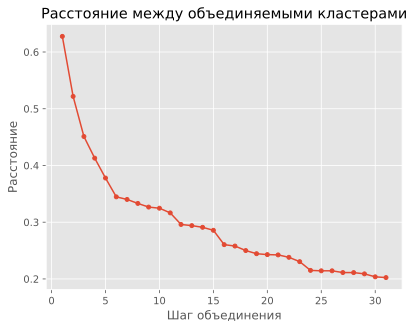

In [304]:
dist = Z_AVERAGE[:, 2]
dist_rev = list(filter(lambda x: x > 0.2, dist[::-1]))
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=4)
#plt.yticks(np.arange(min(dist_rev[::-1]), max(dist_rev[::-1])+1, 3))
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

Анализируя этот график и дендрограмму попробуем взять 12 кластеров

И зададим высоту 0.35

In [305]:
h_average = 0.35

In [306]:
X_AVERAGE['cluster'] = fcluster(Z_AVERAGE, h_average, criterion='distance')

In [307]:
X_AVERAGE.head()

,B,C,D,E,F,G,H,cluster
0,1,0,1,0,0,1,0,1
1,0,0,1,0,0,1,0,1
2,0,1,1,1,0,1,0,2
3,1,1,1,1,1,0,0,3
4,0,1,1,1,1,1,1,2


In [308]:
X_AVERAGE.groupby('cluster').size()

cluster
1     77
2     59
3     56
4    118
5    189
6      1
dtype: int64

In [309]:
X_AVERAGE.groupby('cluster').mean()

,B,C,D,E,F,G,H
cluster,,,,,,,
1,0.506494,0.064935,0.896104,0.103896,0.155844,0.896104,0.000000
2,0.000000,0.796610,1.000000,0.830508,0.101695,0.949153,0.389831
3,0.857143,0.196429,0.875000,0.946429,0.785714,0.000000,0.910714
4,0.864407,0.889831,0.000000,0.932203,0.525424,0.898305,0.838983
5,0.984127,0.693122,0.984127,0.756614,0.455026,0.978836,0.846561
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [310]:
ct_AVERAGE = pd.crosstab(X_AVERAGE["cluster"], Y_AVERAGE)
ct_AVERAGE

A,eight,five,four,nine,one,seven,six,three,two,zero
cluster,,,,,,,,,,
1,0,0,4,0,33,37,0,1,0,2
2,4,0,37,3,9,1,0,4,0,1
3,4,1,3,4,0,1,0,2,40,1
4,6,45,4,7,0,1,49,3,2,1
5,44,8,4,41,0,8,1,45,1,37
6,0,0,0,0,1,0,0,0,0,0


Как итог результат еще хуже, очень много пустых кластеров и много кластеров в которых 2, а то и 3 доминирующих значения.

Метод средних с метрикой хамминг дал еще более плохие результаты, особенно кластер 3 (при условии, что у нас целых 12 кластеров) собрал в себе сразу 3 числа: 8 9 и 0

#### Попробуем исопльзовать метод средних с метрикой джакарда

Jaccard игнорирует совпадения 0–0 и сравнивает в основном включённые сегменты (то есть “форму цифры”).

In [311]:
Z_J = linkage(X_J, method="average", metric="jaccard")
print(type(Z_J))
print(Z_J.shape)
print(Z_J[:10])

<class 'numpy.ndarray'>
(499, 4)
[[  0.  13.   0.   2.]
 [  1.   5.   0.   2.]
 [  2.  18.   0.   2.]
 [ 42. 324.   0.   2.]
 [ 64. 210.   0.   2.]
 [263. 504.   0.   3.]
 [287. 505.   0.   4.]
 [ 11.  25.   0.   2.]
 [ 35. 507.   0.   3.]
 [ 45. 508.   0.   4.]]


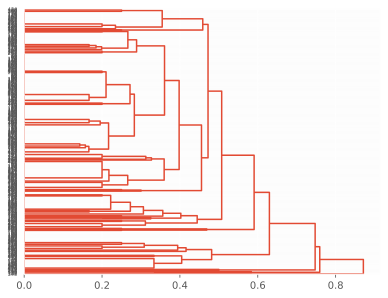

In [312]:
dn = dendrogram(Z_J,
                color_threshold=-1,
                labels=df.index.tolist(),
                orientation='right'
                )

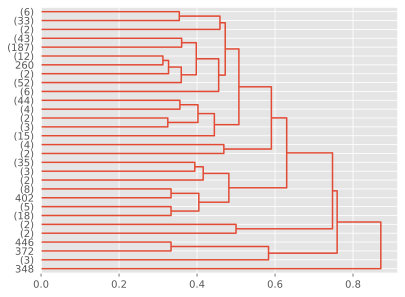

In [313]:
dn = dendrogram(Z_J,
                color_threshold=-1,
                labels=df.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=30
                )

Воспользуемся графиком "Каменистая осыпь"

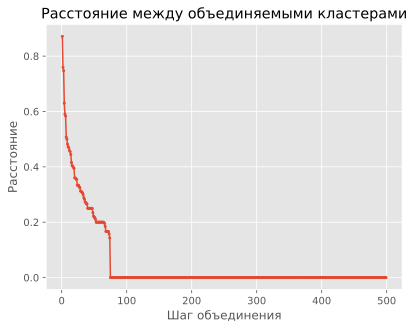

In [314]:
dist = Z_J[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=2)
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

Очень много нулевых значений, избавимся от них

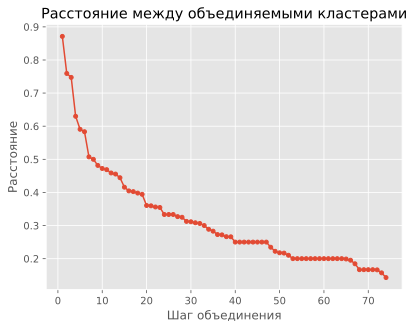

In [315]:
dist = Z_J[:, 2]
dist_rev = list(filter(lambda x: x > 0, dist[::-1]))
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=4)
#plt.yticks(np.arange(min(dist_rev[::-1]), max(dist_rev[::-1])+1, 3))
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

В этой кластеризации виднеется подъем после 7 кластера, зададим h_J = 0.55

In [316]:
h_J = 0.55

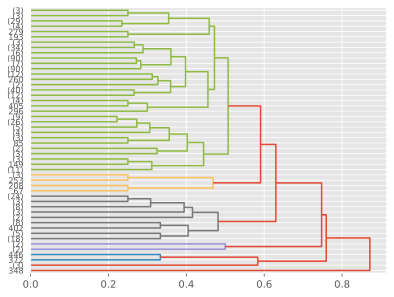

In [317]:
dn = dendrogram(Z_J,
                color_threshold=h_J,
                labels=df.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=50
                )

In [318]:
X_J['cluster'] = fcluster(Z_J, h_J, criterion='distance')

In [319]:
X_J.head()

,B,C,D,E,F,G,H,cluster
0,1,0,1,0,0,1,0,4
1,0,0,1,0,0,1,0,4
2,0,1,1,1,0,1,0,6
3,1,1,1,1,1,0,0,6
4,0,1,1,1,1,1,1,6


In [320]:
X_J.groupby('cluster').size()

cluster
1      3
2      2
3      4
4     72
5      6
6    412
7      1
dtype: int64

In [321]:
X_J.groupby('cluster').mean()

,B,C,D,E,F,G,H
cluster,,,,,,,
1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.500000,0.000000,1.000000,0.000000
4,0.555556,0.111111,0.958333,0.000000,0.208333,0.958333,0.069444
5,1.000000,0.833333,0.000000,0.333333,1.000000,0.500000,0.000000
6,0.796117,0.694175,0.701456,0.866505,0.458738,0.825243,0.796117
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [322]:
ct_J = pd.crosstab(X_J["cluster"], Y_J)
ct_J

A,eight,five,four,nine,one,seven,six,three,two,zero
cluster,,,,,,,,,,
1,0,0,0,0,2,1,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0
3,0,0,2,0,2,0,0,0,0,0
4,0,0,0,1,32,35,0,0,0,4
5,0,1,0,0,0,0,3,0,1,1
6,58,53,50,54,5,12,47,54,42,37
7,0,0,0,0,1,0,0,0,0,0


По этой таблице мы видим, что у нас в кластере 4 отображаются знакомые нам 1 и 7 в одном кластере

А все остальные числа попали в кластер 6

Остальне кластеры нам явно ничего не показывают

Попробуем разрезать дендрограмму ниже

Попробуем задать количество кластеров по следующему скачку на каменистой осыпи

Количество кластеров будет = 15

In [323]:
h_J_C = 15

In [324]:
X_J['cluster'] = fcluster(Z_J, h_J_C, criterion='maxclust')

In [325]:
X_J.head()

,B,C,D,E,F,G,H,cluster
0,1,0,1,0,0,1,0,6
1,0,0,1,0,0,1,0,5
2,0,1,1,1,0,1,0,10
3,1,1,1,1,1,0,0,10
4,0,1,1,1,1,1,1,10


In [327]:
X_J.groupby('cluster').size()

cluster
1       3
2       2
3       2
4       2
5      32
6      40
7       2
8       4
9      15
10     53
11      6
12    297
13      2
14     39
15      1
dtype: int64

In [328]:
X_J.groupby('cluster').mean()

,B,C,D,E,F,G,H
cluster,,,,,,,
1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
5,0.000000,0.000000,0.968750,0.000000,0.281250,1.000000,0.156250
6,1.000000,0.200000,0.950000,0.000000,0.150000,0.925000,0.000000
7,1.000000,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000
8,1.000000,1.000000,0.000000,0.000000,1.000000,0.750000,0.000000
9,0.000000,1.000000,0.000000,1.000000,0.533333,1.000000,0.733333


In [329]:
ct_J = pd.crosstab(X_J["cluster"], Y_J)
ct_J

A,eight,five,four,nine,one,seven,six,three,two,zero
cluster,,,,,,,,,,
1,0,0,0,0,2,1,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,2,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0
5,0,0,0,0,28,4,0,0,0,0
6,0,0,0,1,4,31,0,0,0,4
7,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,3,0,0,1
9,1,5,4,0,0,0,4,1,0,0


У нас разделились 7 и 1 на отдельные кластеры 5 и 6 соответственно

цифра 4 попала в кластер 10, а цифра 2 в кластер 14

Остальные 6 цифр остались в кластере 12

Пробуем разрезать кластеры еще ниже, по следующему скачку на каменистой осыпи

Следующее количество кластеров уже будет 20

In [330]:
h_J_C = 20

In [331]:
X_J['cluster'] = fcluster(Z_J, h_J_C, criterion='maxclust')

In [332]:
X_J.groupby('cluster').size()

cluster
1       3
2       2
3       2
4       2
5      23
6       9
7       2
8       3
9      35
10      2
11      4
12     15
13      5
14     48
15      6
16     67
17    230
18      2
19     39
20      1
dtype: int64

In [333]:
X_J.groupby('cluster').mean()

,B,C,D,E,F,G,H
cluster,,,,,,,
1,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
2,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
4,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
5,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.217391
6,0.000000,0.000000,0.888889,0.000000,1.000000,1.000000,0.000000
7,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
8,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
9,1.000000,0.228571,1.000000,0.000000,0.171429,1.000000,0.000000


In [334]:
ct_J = pd.crosstab(X_J["cluster"], Y_J)
ct_J

A,eight,five,four,nine,one,seven,six,three,two,zero
cluster,,,,,,,,,,
1,0,0,0,0,2,1,0,0,0,0
2,0,0,0,0,1,0,0,1,0,0
3,0,0,0,0,2,0,0,0,0,0
4,0,0,2,0,0,0,0,0,0,0
5,0,0,0,0,21,2,0,0,0,0
6,0,0,0,0,7,2,0,0,0,0
7,0,0,0,0,0,2,0,0,0,0
8,0,0,0,0,1,2,0,0,0,0
9,0,0,0,1,3,27,0,0,0,4


Увеличение числа кластеров как и ожидалось не помогает, 1 дальше удалилась от 7 и между ними появились кластеры, которые так же содержат только 1 или 7

А из большого кластера извлеклась только 3

Попробуем еще метод complete + jaccard

Jaccard выбран, чтобы сравнивать объекты по форме цифры (активные сегменты), игнорируя совпадения 0–0. Complete linkage обеспечивает строгое объединение и обычно даёт более чистые (менее смешанные) кластеры по сравнению с average, если нужен акцент на однородности внутри кластеров.

In [341]:
Z_CJ = linkage(X_CJ, method="complete", metric="jaccard")

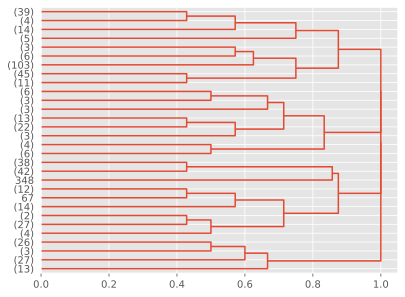

In [342]:
dn = dendrogram(Z_CJ,
                color_threshold=-1,
                labels=df.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=30
                )

По дендрограмме хочется разбить на 8 кластеров, посмотрим каменистую осыпь

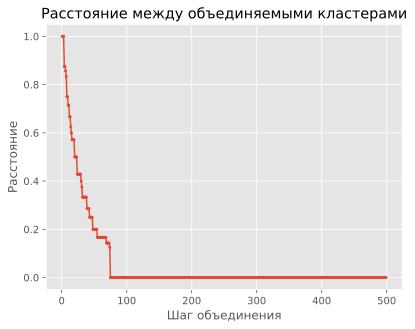

In [343]:
dist = Z_CJ[:, 2]
dist_rev = dist[::-1]
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=2)
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

Очень много нулевых значений, избавимся от них

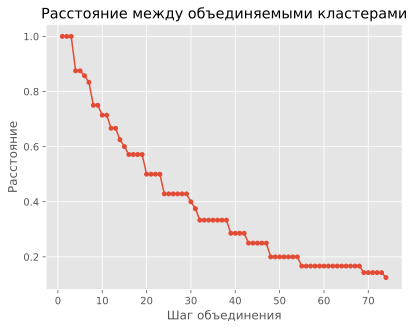

In [344]:
dist = Z_CJ[:, 2]
dist_rev = list(filter(lambda x: x > 0, dist[::-1]))
idxs = range(1, len(dist_rev) + 1)
plt.plot(idxs, dist_rev, marker='o', markersize=4)
#plt.yticks(np.arange(min(dist_rev[::-1]), max(dist_rev[::-1])+1, 3))
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние');

Очень много скачков, но на 8 кластере он тоже есть и один из самых больших, поэтому попробуем его

In [345]:
h_CJ = 0.8

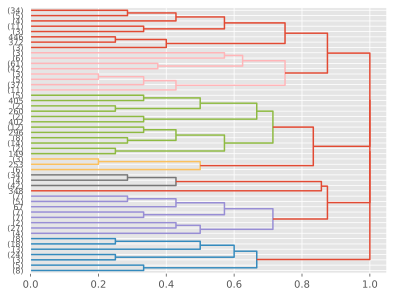

In [347]:
dn = dendrogram(Z_CJ,
                color_threshold=h_CJ,
                labels=df.index.tolist(),
                orientation='right',
                truncate_mode='lastp',
                p=50
                )

In [348]:
X_CJ['cluster'] = fcluster(Z_CJ, h_CJ, criterion='distance')

In [350]:
X_CJ.groupby('cluster').size()

cluster
1     69
2     60
3     80
4      1
5     10
6     50
7    168
8     62
dtype: int64

In [351]:
X_CJ.groupby('cluster').mean()

,B,C,D,E,F,G,H
cluster,,,,,,,
1,0.507246,0.188406,1.000000,0.000000,0.115942,0.913043,0.057971
2,0.850000,0.350000,0.766667,1.000000,0.766667,0.000000,0.883333
3,1.000000,0.800000,0.000000,1.000000,0.475000,0.950000,1.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
5,1.000000,0.700000,0.600000,0.000000,1.000000,0.900000,0.000000
6,0.880000,0.580000,0.520000,0.760000,0.260000,1.000000,0.120000
7,0.916667,0.648810,1.000000,0.732143,0.482143,0.958333,1.000000
8,0.016129,0.903226,0.774194,1.000000,0.225806,0.919355,0.354839


In [352]:
ct = pd.crosstab(X_CJ["cluster"], Y_CJ)
ct

A,eight,five,four,nine,one,seven,six,three,two,zero
cluster,,,,,,,,,,
1,0,0,1,1,29,35,0,0,0,3
2,6,4,3,5,0,0,4,2,35,1
3,2,33,0,6,0,0,32,2,5,0
4,0,0,0,0,1,0,0,0,0,0
5,0,0,0,1,2,0,3,0,0,4
6,6,6,7,4,2,11,6,8,0,0
7,39,6,1,35,6,2,1,41,3,34
8,5,5,40,3,3,0,4,2,0,0


Результат аналогичен методу Варда